In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [2]:
#Dados iniciais

A = 5 #m^2
h = 0.5 #m
V = A*h

Fin = 10 #m^3/h

k1 = 10 #1/s
k2 = 1 #1/s
k3 = 0.5 #1/s

Ca0 = 0.6 #mol/m^3
Cb0 = 0 #mol/m^3
Cc0 = 0 #mol/m^3
Cd0 = 0 #mol/m^3

Cv = 7 #m^(2,5/h)

In [3]:
# Vetor tempo

t = np.linspace (0.1, 10)

In [4]:
#Equações diferenciais

def EDOs(y,x):

    V, Ca, Cb, Cc, Cd = y

    tr = V/Fin
    r1 = k1*Ca
    r2 = k2*Cb
    r3 = k3*Ca**2
    Fout = Cv*((h)**(1/2))
    dVdt = Fin - Fout
    dcadt = (-tr*r1)+(-2*tr*r3)+Ca0-Ca
    dcbdt = (tr*r1)+(-tr*r2)+Cb0-Cb
    dccdt = (tr*r2)+Cc0-Cc
    dcddt = (tr*r3)+Cd0-Cd
    return [dVdt, dcadt, dcbdt,dccdt, dcddt]

y = odeint(EDOs, [V, Ca0, Cb0, Cc0, Cd0], t)

In [5]:
#Vetores de concentração

vetorV = y[:,0]
vetorCa = y[:,1]
vetorCb = y[:,2]
vetorCc = y[:,3]
vetorCd = y[:,4]

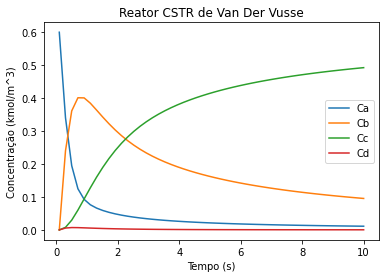

In [6]:
#Exibição gráfica

plt.plot(t,vetorCa)
plt.plot(t, vetorCb)
plt.plot(t, vetorCc)
plt.plot(t, vetorCd)
plt.xlabel('Tempo (s)')
plt.ylabel('Concentração (kmol/m^3)')
plt.title('Reator CSTR de Van Der Vusse')
plt.legend(['Ca','Cb','Cc','Cd'])
plt.show()